# BANK NOTE ANALYSIS

**Data Set Information:**

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

**Attribute Information:**

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Dataset: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

UCI: http://archive.ics.uci.edu/ml/datasets/banknote+authentication

## Can we classify banknote as fake or genuine?

# 1. Data Analysis

In [57]:
# pyforest library import all the libraries nstead of importing one by one 
from pyforest import*

In [58]:
# seeing all the libraries that were imported
lazy_imports()

['from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import glob',
 'from pathlib import Path',
 'import keras',
 'from sklearn.ensemble import RandomForestClassifier',
 'from openpyxl import load_workbook',
 'import numpy as np',
 'import nltk',
 'from sklearn.model_selection import train_test_split',
 'import lightgbm as lgb',
 'import awswrangler as wr',
 'import os',
 'from pyspark import SparkContext',
 'from dask import dataframe as dd',
 'from sklearn.manifold import TSNE',
 'import dash',
 'from sklearn.preprocessing import OneHotEncoder',
 'import datetime as dt',
 'import plotly.graph_objs as go',
 'import gensim',
 'from sklearn.ensemble import GradientBoostingRegressor']

In [59]:
# loading data set 
df = pd.read_csv('/content/BankNote_Authentication.csv')
df.head()

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [60]:
# checking the dataset 
df.shape

(1372, 5)

In [61]:
# checking missing values 
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

There are no missing values.

In [62]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

All the variables are continuous in this dataset.

In [63]:
# checking the target variable 
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

Target varibale is not so imbalanced. Therefore no further transforming is required for this variable.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

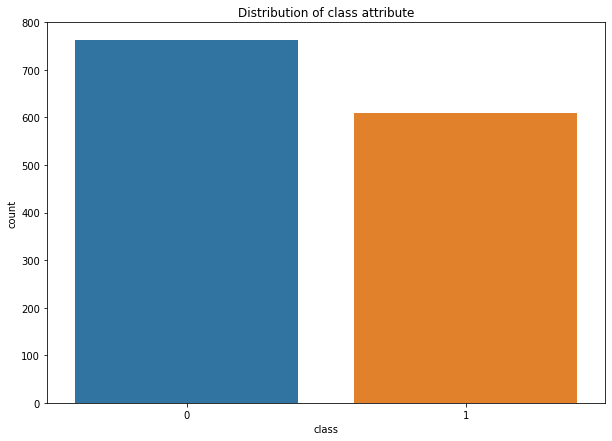

In [64]:
# univariate analysis of targhet variable
plt.figure(figsize=(10,7))
plt.title('Distribution of class attribute')
sns.countplot(df['class'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f001744ce90>,
      dtype=object)

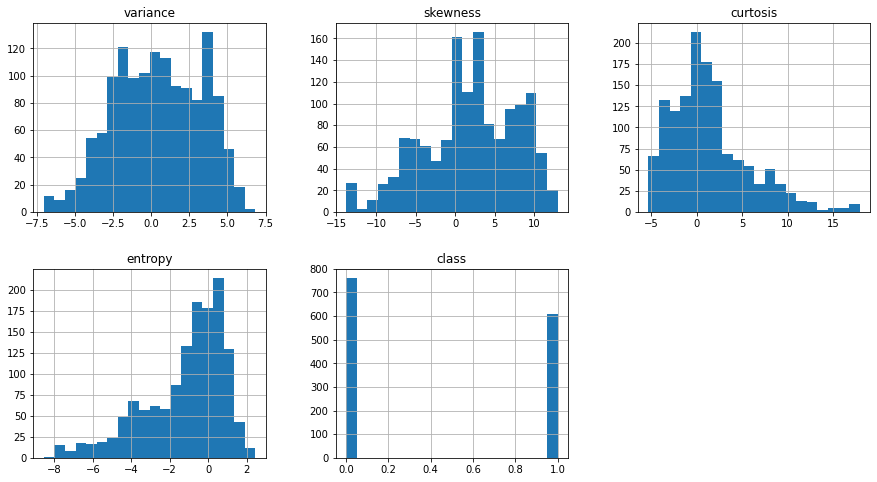

In [65]:
# multivariate analysis for other variables 
df.hist(bins=20, figsize=(15,8), layout=(2,3))

* Curtosis is positively skeweed while entropy is negatively skewed.
* variance and skewness represents very close structure to uniform bell curve.

<IPython.core.display.Javascript object>

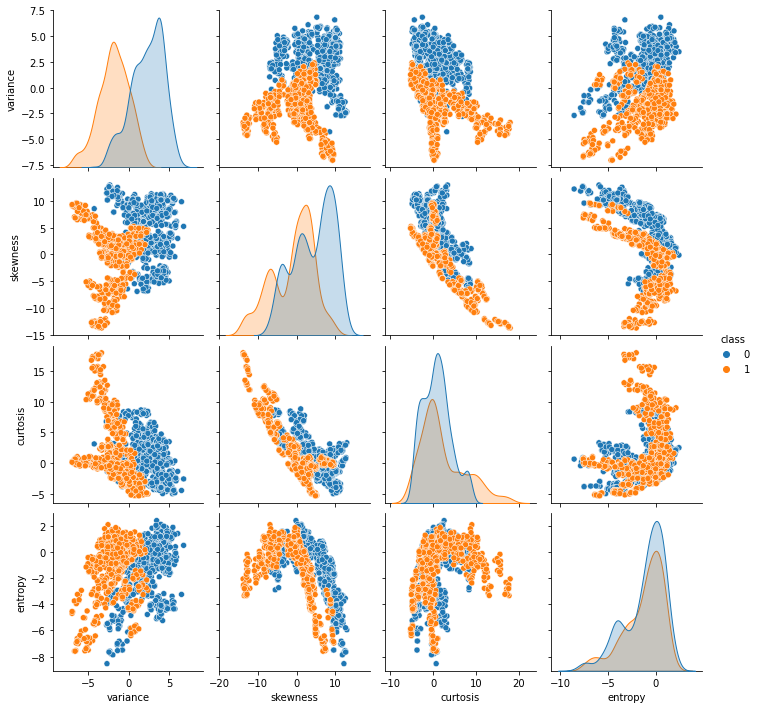

In [66]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(df, hue='class')

* The diagonal charts shows two peaks, which denotes that there are two classes, in our class its either o or 1.
* From the plots, it can be deduced that the corelation between two variables is low. Some are positively linearly realted like variance vs entropy, while custosis vs skewness are negatively related.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

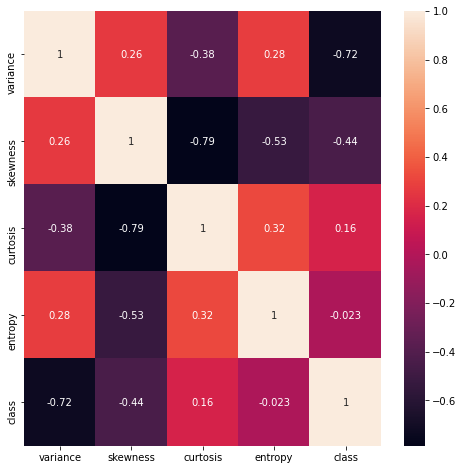

In [67]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

# 2. Model building 

In [68]:
# seperating independent and dependent variables 
x =  df.drop(['class'], axis=1)
y = df['class']
x.shape, y.shape

((1372, 4), (1372,))

In [69]:
# dividing into train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=4)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((960, 4), (412, 4), (960,), (412,))

In [70]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [71]:
x_train

array([[ 0.46178204, -0.40957569,  0.66682134,  0.10749242],
       [-1.39225552,  0.21737245, -0.43627159, -1.10314982],
       [-1.47551049, -2.53591127,  3.35822814, -0.02828712],
       ...,
       [ 1.50222618,  0.0093314 , -0.38088555,  1.30480142],
       [ 0.51323487,  0.07149791,  0.2692897 ,  0.74887983],
       [-1.4344385 , -2.56451948,  2.7257233 , -0.68604102]])

## a. Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(solver='liblinear', random_state=4)
logreg.fit(x_train, y_train)

accuracies = cross_val_score(estimator=logreg, X=x_test, y=y_test)
# determines the cross validation splitting strategy (default is 5 folds)

print('Accuracies: \n', accuracies)

pred = logreg.predict(x_test)

print('\n Mean accuracy: ', accuracies.mean())

Accuracies: 
 [0.97590361 0.98795181 0.97560976 1.         0.95121951]

 Mean accuracy:  0.9781369379958861


In [73]:
accuracy_score(y_test, pred)

0.9805825242718447

Confusion Matrix for logistic regression


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

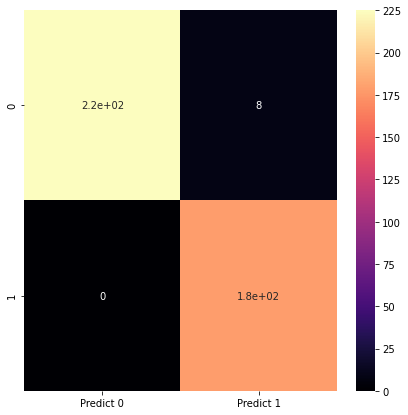

In [74]:
from sklearn import metrics

print('Confusion Matrix for logistic regression')

cm = metrics.confusion_matrix(y_test, pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in [0,1]],
                     columns=[i for i in ['Predict 0', 'Predict 1']])

plt.figure(figsize=(7,7))

sns.heatmap(df_cm, annot=True, cmap='magma')

In [75]:
df_cm

,Predict 0,Predict 1
0,225,8
1,0,179


## b. Kneighbors classifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {
    'leaf_size': [2,5,7,9,11],
    'n_neighbors': [2,5,7,9,11],
    'p': [1,2]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [78]:
final_knn = grid.best_estimator_

knn = KNeighborsClassifier(n_neighbors=2, p=1, leaf_size=2)

knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')

In [79]:
knn_pred = knn.predict(x_test)

accuracy_score(y_test, knn_pred)

1.0

Confusion Matrix for KNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

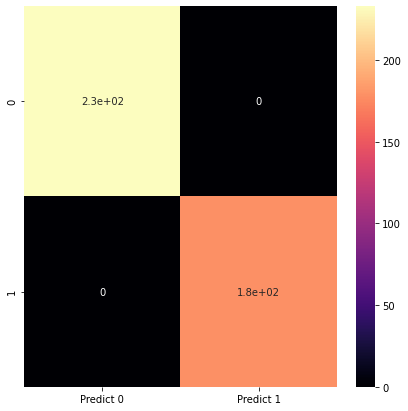

In [80]:
print('Confusion Matrix for KNN')

cm = metrics.confusion_matrix(y_test, knn_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in [0,1]],
                     columns=[i for i in ['Predict 0', 'Predict 1']])

plt.figure(figsize=(7,7))

sns.heatmap(df_cm, annot=True, cmap='magma')

In [81]:
df_cm

,Predict 0,Predict 1
0,233,0
1,0,179


## c. RandomForest

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=4)

rf.fit(x_train, y_train)

rf_accuracies = cross_val_score(rf, X=x_test, y=y_test, cv=10)

print('Accuracies" \n', rf_accuracies)
print()
print('Mean Accuracy: ', rf_accuracies.mean())

Accuracies" 
 [1.         1.         0.95121951 1.         0.97560976 0.97560976
 0.97560976 1.         0.92682927 0.95121951]

Mean Accuracy:  0.975609756097561


In [83]:
rf_pred = rf.predict(x_test)

accuracy_score(y_test, rf_pred)

0.9927184466019418

Confusion Matrix for Randomforest


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

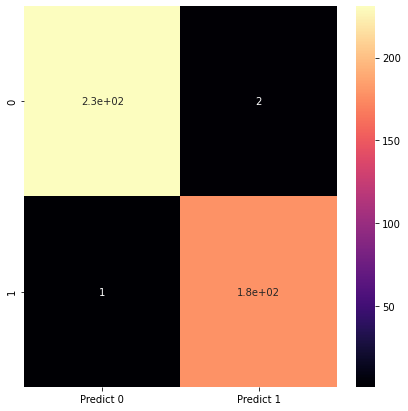

In [84]:
print('Confusion Matrix for Randomforest')

cm = metrics.confusion_matrix(y_test, rf_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in [0,1]],
                     columns=[i for i in ['Predict 0', 'Predict 1']])

plt.figure(figsize=(7,7))

sns.heatmap(df_cm, annot=True, cmap='magma')

In [85]:
df_cm

,Predict 0,Predict 1
0,231,2
1,1,178


## d. XGB

In [86]:
from xgboost import XGBClassifier

xg = XGBClassifier()

xg.fit(x_train, y_train)

xg_accuracies = cross_val_score(xg, X=x_test, y=y_test, cv=10)

print('Accuracies" \n', xg_accuracies)
print()
print('Mean Accuracy: ', xg_accuracies.mean())


Accuracies" 
 [1.         1.         0.97560976 1.         1.         0.97560976
 0.97560976 1.         0.92682927 0.92682927]

Mean Accuracy:  0.978048780487805


In [87]:
xg_pred = xg.predict(x_test)

accuracy_score(y_test, xg_pred)

0.9951456310679612

Confusion Matrix for XGB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

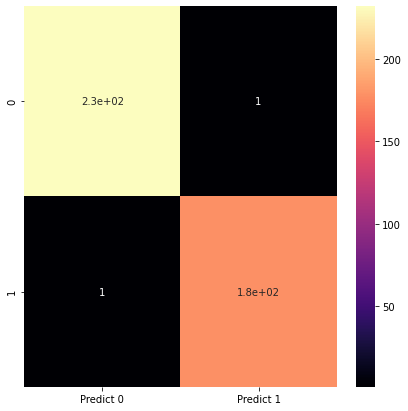

In [88]:
print('Confusion Matrix for XGB')

cm = metrics.confusion_matrix(y_test, xg_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in [0,1]],
                     columns=[i for i in ['Predict 0', 'Predict 1']])

plt.figure(figsize=(7,7))

sns.heatmap(df_cm, annot=True, cmap='magma')

In [89]:
df_cm

,Predict 0,Predict 1
0,232,1
1,1,178


## e. Multilayer perceptron

In [90]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,4), max_iter=5000, alpha=0.0001, 
                    solver='sgd', verbose=10, random_state=4, tol=0.000000001)

mlp.fit(x_train, y_train)

mlp_accuracies = cross_val_score(mlp, X=x_test, y=y_test, cv=10)

Streaming output truncated to the last 5000 lines.
Iteration 1, loss = 0.78143782
Iteration 2, loss = 0.77973253
Iteration 3, loss = 0.77720775
Iteration 4, loss = 0.77386828
Iteration 5, loss = 0.77006532
Iteration 6, loss = 0.76597891
Iteration 7, loss = 0.76153285
Iteration 8, loss = 0.75671913
Iteration 9, loss = 0.75187722
Iteration 10, loss = 0.74682059
Iteration 11, loss = 0.74179207
Iteration 12, loss = 0.73699799
Iteration 13, loss = 0.73172108
Iteration 14, loss = 0.72662446
Iteration 15, loss = 0.72173644
Iteration 16, loss = 0.71669285
Iteration 17, loss = 0.71178737
Iteration 18, loss = 0.70687102
Iteration 19, loss = 0.70183322
Iteration 20, loss = 0.69712115
Iteration 21, loss = 0.69221385
Iteration 22, loss = 0.68719656
Iteration 23, loss = 0.68260826
Iteration 24, loss = 0.67798602
Iteration 25, loss = 0.67317268
Iteration 26, loss = 0.66859145
Iteration 27, loss = 0.66416297
Iteration 28, loss = 0.65964143
Iteration 29, loss = 0.65532219
Iteration 30, loss = 0.6510928

In [91]:
print("Accuracies:\n",mlp_accuracies)
print()
print("Mean Accuracy: ",mlp_accuracies.mean())

Accuracies:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Mean Accuracy:  1.0


In [92]:
mlp_pred = mlp.predict(x_test)

accuracy_score(y_test, mlp_pred)

1.0

Confusion Matrix for Multi layer perceptron


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

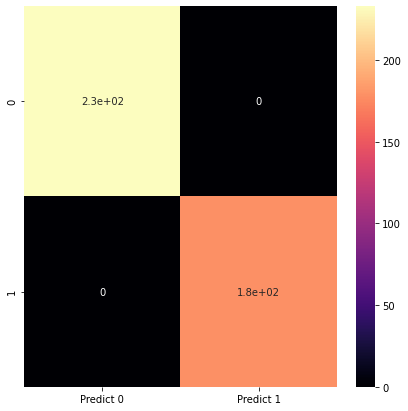

In [93]:
print('Confusion Matrix for Multi layer perceptron')

cm = metrics.confusion_matrix(y_test, mlp_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in [0,1]],
                     columns=[i for i in ['Predict 0', 'Predict 1']])

plt.figure(figsize=(7,7))

sns.heatmap(df_cm, annot=True, cmap='magma')

In [94]:
print("LogisticRegression:", accuracy_score(y_test,pred))
print()
print("RandomForestClassifier:", accuracy_score(y_test,rf_pred))
print()
print("KNeighborsClassifier:", accuracy_score(y_test,knn_pred))
print()
print("XGBClassifier:", accuracy_score(y_test,xg_pred))
print()
print("MLPClassifier:", accuracy_score(y_test,mlp_pred))

LogisticRegression: 0.9805825242718447

RandomForestClassifier: 0.9927184466019418

KNeighborsClassifier: 1.0

XGBClassifier: 0.9951456310679612

MLPClassifier: 1.0
